

# 1.   **¿Qué es un paradigma de programación?**
Un paradigma de programación es una forma o enfoque de desarrollar el código, en este caso se usará programación orientada a objetos, la cual se explicará en la sigueinte pregunta
# 2.   ¿En qué se basa la programación orientada a objetos?
La Programación Orientada a Objetos  es un estilo de programación que organiza el código en "objetos", . Estos objetos tienen atributos (características) y métodos (acciones o comportamientos que pueden realizar).

# 3. ¿Cuál es la diferencia entre recursividad e iteración, y cómo se relaciona esto con la notación
big 𝑂?
La recursividad es una función que se llama a si misma y la iteración es un proceso que se repite N veces y tiene complejidad temporal lineal. En cambio la recursividad depende netamente de la recurrencia y de qué tan optimizado esté el algoritmo.

# 4. explicar la diferencia de rendimiento entre 𝑂(1) y 𝑂(𝑛)
O(1) es una complejidad temporal que no depende del tamaño de la entrada, en camnbio, O(n) presenta un comportamiento lineal con respecto a la entrada.

# 5. ¿Cómo se calcula el orden en un programa que funciona por etapas?
Si un programa tiene múltiples etapas secuenciales, el orden total es el máximo de las complejidades de cada etapa. Si las etapas se ejecutan en paralelo, se considera la más costosa.

# 6.¿Cómo se puede determinar la complejidad temporal de un algoritmo recursivo?
Se puede determinar usando el teorema maestro. El cual entrega la complejidad temporal de un algoritmo recursivo, dependiendo de su estructura y parametros.




Ingresa una lista de grillas (por ejemplo: [(1, 2), (2, 2), (3, 4)]): [(1, 2), (2, 2), (3, 4)]
Elige el método de cálculo: 1) Dinámico o 2) Combinatorio
Ingresa 1 o 2: 1
Tiempo de ejecución promedio de caminos_dinamica: 0.0000027895 segundos
Tiempo de ejecución promedio de caminos_dinamica: 0.0000044107 segundos
Tiempo de ejecución promedio de caminos_dinamica: 0.0000077248 segundos


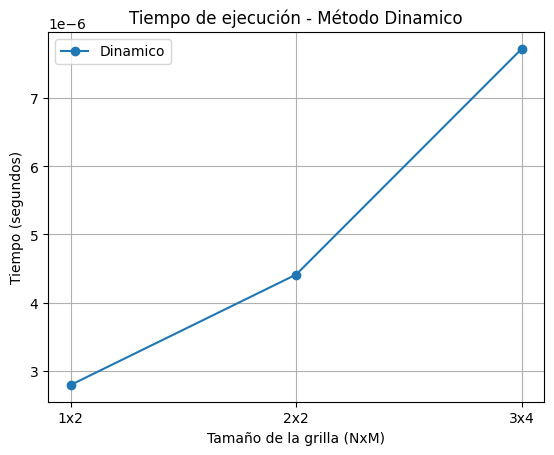

In [24]:
import math
import time
import matplotlib.pyplot as plt

#decorador
def calculotiempo(func):
    def nuevafunc(*args, **kwargs):
        num_repeticiones = 10  #repito los calculos 10 veces para tener un promedio y asi respuestas mas precisas
        tiempos = []
        for _ in range(num_repeticiones):
            inicio = time.time()
            resultado = func(*args, **kwargs)

            fin = time.time()
            tiempos.append(fin - inicio)
        tiempo_promedio = sum(tiempos) / num_repeticiones
        print(f"Tiempo de ejecución promedio de {func.__name__}: {tiempo_promedio:.10f} segundos")
        return resultado, tiempo_promedio
    return nuevafunc

class PCBCaminos:
    def __init__(self, N, M):
        self.N = N  #filas
        self.M = M  #columnas

    @calculotiempo
    #calculo los caminos usando combinatoria
    def caminos_combi(self):
        total = (self.N - 1) + (self.M - 1)
        abajo = self.N - 1
        return math.comb(total, abajo)

    @calculotiempo
    #usando progra dinamica
    def caminos_dinamica(self):
        dp = [[0] * self.M for _ in range(self.N)]
        for i in range(self.N):
            dp[i][0] = 1
        for j in range(self.M):
            dp[0][j] = 1
        for i in range(1, self.N):
            for j in range(1, self.M):
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
        return dp[self.N-1][self.M-1]

    #metodo que permite elegir el camino a seguir
    def elegir_metodo(self):
        while True:
            print("Elige el método de cálculo: 1) Dinámico o 2) Combinatorio")
            respuesta = input("Ingresa 1 o 2: ")
            if respuesta == '1':
                return "dinamico"
            elif respuesta == '2':
                return "combinatorio"
            else:
                print("Opción no válida")

    #graficos
    def generar_graficos(self, tamano, metodo):
        tiempos = []

        for N, M in tamano:
            self.N, self.M = N, M
            if metodo == "combinatorio":
                _, tiempo = self.caminos_combi()
            elif metodo == "dinamico":
                _, tiempo = self.caminos_dinamica()
            tiempos.append(tiempo)

        #grafico tiempos
        plt.figure()
        tamano_labels = [f"{N}x{M}" for N, M in tamano]
        plt.plot(tamano_labels, tiempos, label=metodo.capitalize(), marker='o')

        plt.title(f"Tiempo de ejecución - Método {metodo.capitalize()}")
        plt.xlabel("Tamaño de la grilla (NxM)")
        plt.ylabel("Tiempo (segundos)")
        plt.legend()
        plt.grid(True)



#funcion para solicitar las grillas
def pedir_grilla():
    while True:
        try:
            tamano = eval(input("Ingresa una lista de grillas (por ejemplo: [(1, 2), (2, 2), (3, 4)]): "))
            if all(isinstance(i, tuple) and len(i) == 2 for i in tamano):  #verificar que sean tuplas tamaño 2
                return tamano
            else:
                print("Formato incorrecto.")
        except (SyntaxError, NameError):
            print("intentar de nuevo")


if __name__ == "__main__":
    tamano = pedir_grilla()  #ingresar varias tuplas
    pcb = PCBCaminos(3, 3)  #inicializo
    metodo = pcb.elegir_metodo()  #elegir metodo de calculo de caminos
    pcb.generar_graficos(tamano, metodo)
